<a href="https://colab.research.google.com/github/RayanTech/Find_Lanes_for_Self-Driving_Cars/blob/main/Find_Lanes_for_Self_Driving_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
image = cv2.imread('/content/drive/MyDrive/ColabNotebooks/Find-Lanes-for-Self-Driving-Cars/test_image.jpg')
l_img = np.copy(image)

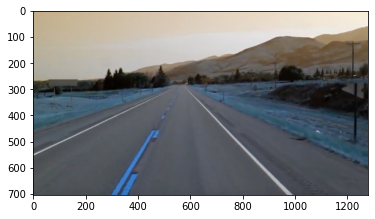

In [49]:
plt.imshow(image)
plt.show()

In [42]:
def canny(image):
  gray = cv2.cvtColor(l_img, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5),0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

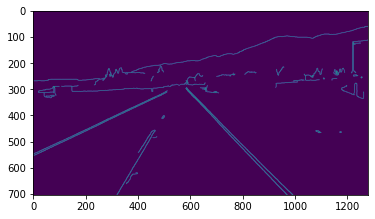

In [53]:
plt.imshow(canny)
plt.show()

In [43]:
def display_lines(image,lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image, (x1,y1),(x2,y2),(255,0,0), 10)
  return line_image

In [44]:
def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([
  [(200,height), (1100, height),(550, 250)]
   ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  masked_img = cv2.bitwise_and(image,mask)
  return masked_img

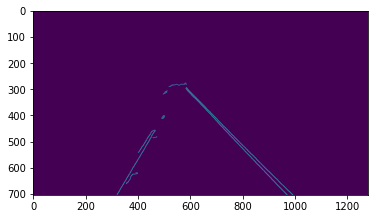

In [46]:
canny = canny(l_img)
cropped_img = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_img, 2,np.pi/180,100 ,np.array([]), minLineLength=40, maxLineGap = 5)
plt.imshow(cropped_img)
plt.show()

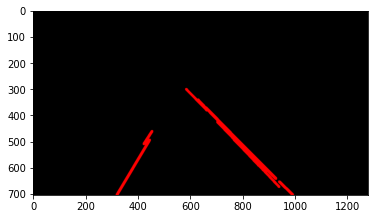

In [47]:
line_image = display_lines(l_img, lines)
plt.imshow(line_image)
plt.show()

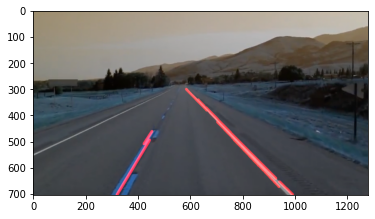

In [54]:
c_image = cv2.addWeighted(l_img, 0.8, line_image, 1 , 1)
plt.imshow(c_image)
plt.show()